# Predicting Hotel Ratings based on the Hotel Reviews

## 1. Introduction

This project is motivated by the significant impact that online hotel reviews have on the travel industry. In today's world, where digital platforms such as `Tripadvisor` are gaining more influence over consumer decisions, it's important to comprehend the nuances of customer reviews. 

This understanding becomes crucial in order to make informed decisions about hotels and to provide better services to travelers. Deciphering and quantifying qualitative data from reviews is the main challenge. This project aims to efficiently analyze and interpret large volumes of feedback, unveil patterns and insights, and impact hotel ratings and customer satisfaction.


In this project, we will explore ratings based on customers' hotel experiences and hotel reviews a. We will also design a deep-learning model to predict ratings based on reviews and perform feature engineering.

We will be using `natural language processing (NLP)` tools to extract features and prepare data for deep learning models.

### Dataset
Hotels play a crucial role in traveling and with the increased access to information new pathways of selecting the best ones emerged.
With this dataset, consisting of `20k reviews` crawled from Tripadvisor, you can explore what makes a great hotel and maybe even use this model in your travels!

**Tripadvisor, Inc.** is an American online travel company that operates a website and mobile app with user-generated content and a comparison shopping website. It also offers online hotel reservations and bookings for transportation, lodging, travel experiences, and restaurants. Its headquarters are in Needham, Massachusetts. [Wikipedia](https://en.wikipedia.org/wiki/Tripadvisor)

## 2. Importing Packages

In [81]:
## All purpose
import pandas as pd 
import numpy as np
import os

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud

## NLP
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import TweetTokenizer
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
from collections import defaultdict


## Deeplearning/ML
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import tensorflow.keras.layers as L
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
from pathlib import Path

# Get the current working directory
current_directory = Path.cwd()
print("Current Working Directory:", current_directory)

Current Working Directory: /Users/mj/Desktop/Springboard Bootcamp/Capstone_2/01_Data Wrangling and EDA


In [3]:
import os

# Define the new path you want to set as your current working directory
new_path = '/Users/mj/Desktop/Springboard Bootcamp/Capstone_2'

# Change the current working directory
os.chdir(new_path)

# Verify the change
print("Current Working Directory:", os.getcwd())

Current Working Directory: /Users/mj/Desktop/Springboard Bootcamp/Capstone_2


## 2. Loading Data

The Tripadvisor Dataset is available publicly available on [Zenodo](https://zenodo.org/record/1219899#.YHwt1J_ivIU).

In [4]:
# Set Paths
data_path = './Data'

# Importing the Trip-Advisor-Hotel-Review Dataset
data_review = os.path.join(data_path,'Hotel_Reviews.xlsx')
hotel_data = pd.read_excel(data_review)

hotel_data.head()

,No,Review,Rating
0,1,nice hotel expensive parking got good deal sta...,4
1,2,ok nothing special charge diamond member hilto...,2
2,3,nice rooms not 4* experience hotel monaco seat...,3
3,4,unique \tgreat stay \twonderful time hotel mon...,5
4,5,great stay great stay \twent seahawk game awes...,5


## 3. Data Wrangling and EDA

In [5]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   No      20491 non-null  int64 
 1   Review  20491 non-null  object
 2   Rating  20491 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 480.4+ KB


In [6]:
hotel_data.shape

(20491, 3)

### Checking Missing Values

In [7]:
hotel_data.isna().sum()

No        0
Review    0
Rating    0
dtype: int64

There is no missing data. 

First, let's check the distribution of rating scores. 

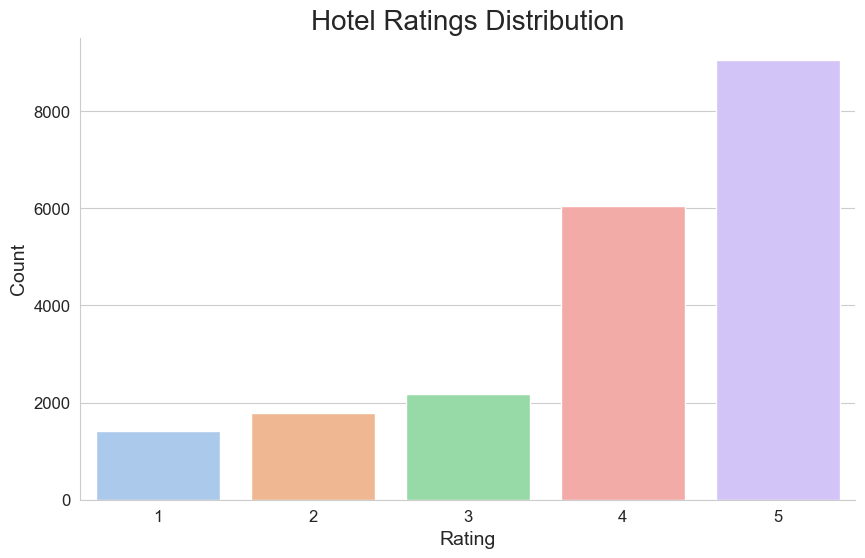

In [8]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
countplot = sns.countplot(data = hotel_data, x='Rating', palette='pastel')
countplot.set_title('Hotel Ratings Distribution', fontsize=20)
countplot.set_xlabel('Rating', fontsize=14)
countplot.set_ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()

plt.show()

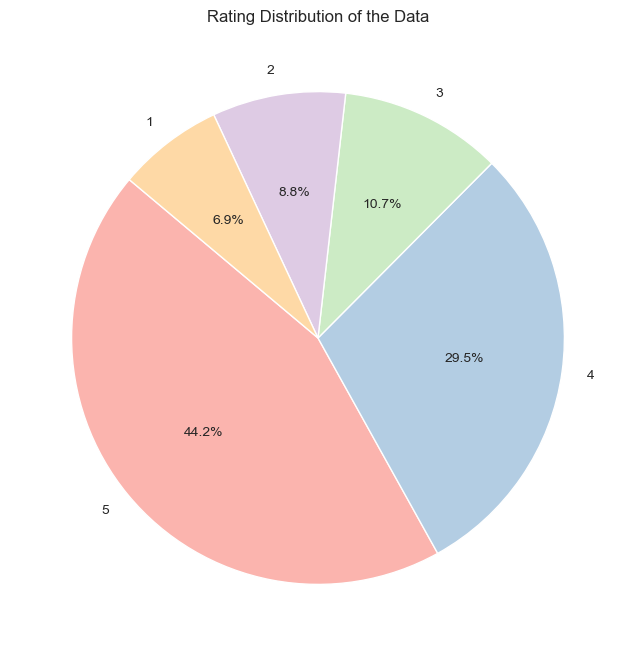

In [9]:
viz_2 = hotel_data['Rating'].value_counts().rename_axis(['Rating']).reset_index(name='counts')

# Plotting pie chart for ratings using matplotlib
plt.figure(figsize=(12, 8))
plt.pie(viz_2.counts, labels=viz_2.Rating, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Rating Distribution of the Data')
plt.show()

There are approximately 9000 ratings of 5 (44.2%) and 6000 ratings of 4 (29.5%).

### Sentiment Analysis

To gain a better understanding of these ratings, we will using `SentimentIntensityAnalyzer` to get sentimental scores and then converting those scores into 3 categorical Sentiments, namely, `Positive`, `Negative`, and `Neutral`.

In [10]:
def calculate_compound_score(text):
    '''
    Calculate the compound sentiment score of a text.
    
    Parameters:
    - text (str): The text to analyze.
    
    Returns:
    - float: The compound sentiment score.
    '''
    analyzer = SentimentIntensityAnalyzer()
    return analyzer.polarity_scores(text)['compound']

# Function to determine the sentiment based on the score
def determine_sentiment(score):
    '''
    Determine the sentiment category based on the compound score.
    
    Parameters:
    - score (float): The compound sentiment score.
    
    Returns:
    - str: The sentiment category ('Positive', 'Negative', 'Neutral').
    '''
    if score >= 0.5:
        return 'Positive'
    elif score <= -0.5:
        return 'Negative'
    else:
        return 'Neutral'

# Applying the compound score calculation
hotel_data['Review'] = hotel_data['Review'].astype(str)  # Ensuring all reviews are string type
hotel_data['Sentiment_Score'] = hotel_data['Review'].apply(calculate_compound_score)

# Applying the sentiment determination
hotel_data['Sentiment'] = hotel_data['Sentiment_Score'].apply(determine_sentiment)

In [11]:
hotel_data.head()

,No,Review,Rating,Sentiment_Score,Sentiment
0,1,nice hotel expensive parking got good deal sta...,4,0.9747,Positive
1,2,ok nothing special charge diamond member hilto...,2,0.9787,Positive
2,3,nice rooms not 4* experience hotel monaco seat...,3,0.9889,Positive
3,4,unique \tgreat stay \twonderful time hotel mon...,5,0.9912,Positive
4,5,great stay great stay \twent seahawk game awes...,5,0.9797,Positive


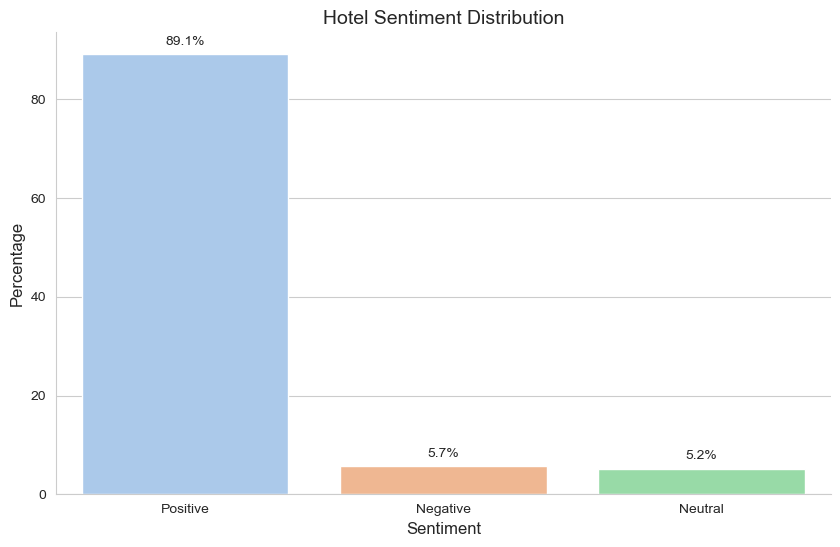

In [12]:
# Calculate percentages
sentiment_counts = hotel_data['Sentiment'].value_counts(normalize=True) * 100
sentiment_percentages = sentiment_counts.reset_index()
sentiment_percentages.columns = ['Sentiment', 'Percentage']

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

barplot = sns.barplot(data=sentiment_percentages, x='Sentiment', y='Percentage', palette='pastel')

# Add title and labels
barplot.set_title('Hotel Sentiment Distribution', fontsize=14)
barplot.set_xlabel('Sentiment', fontsize=12)
barplot.set_ylabel('Percentage', fontsize=12)

# Customize tick parameters
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Annotate bars with percentage values
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f') + '%', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

# Remove top and right borders
sns.despine()

plt.show()

Therefore, we can say almost 90% of reviews are `Positive`. 

<Figure size 1000x600 with 0 Axes>

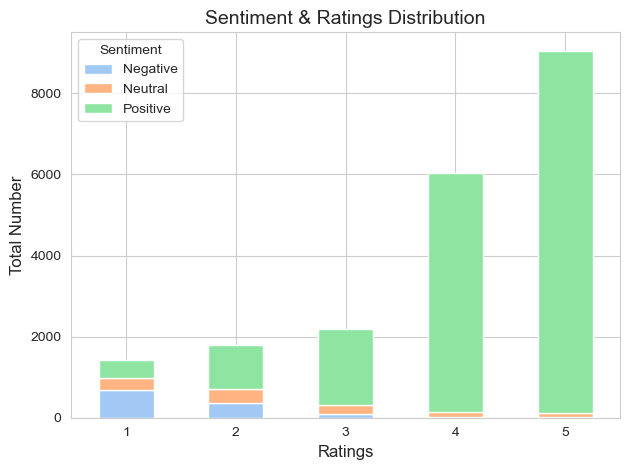

In [13]:
# Preparing data for visualization 
viz_1 = hotel_data[['Rating', 'Sentiment']].value_counts().rename_axis(['Rating', 'Sentiment']).reset_index(name='Counts')
viz_1_pivot = viz_1.pivot(index='Rating', columns='Sentiment', values='Counts').fillna(0)

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
viz_1_pivot.plot(kind='bar', stacked=True, color=sns.color_palette('pastel'))
plt.title('Sentiment & Ratings Distribution', fontsize=14)
plt.xlabel('Ratings', fontsize=12)
plt.ylabel('Total Number', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

> In the bar plot, we can see the distribution of sentiment and rating, people with 5-star ratings have the highest positive sentiment.  
> Whereas at lower ratings its mixed emotions showed by customers review, this can be related to sarcasm tone people have used in lower ratings comments.

To investigate how the sentiment score is affected by the ratings provided in the data, we will plot the joint plot. 

<Figure size 1000x600 with 0 Axes>

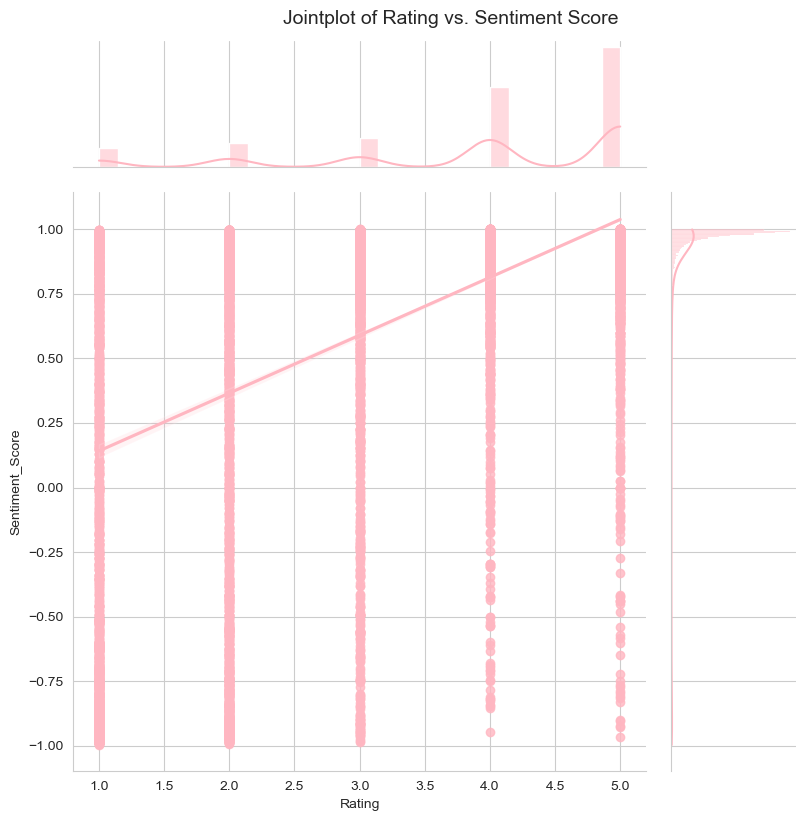

In [14]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
# Create the jointplot
jp = sns.jointplot(data=hotel_data, x='Rating', y='Sentiment_Score', 
                   kind="reg", color='#ffb6c1', height=8, ratio=4, space=0.2)

# Add a title to the jointplot
# Adjust the title position and font size
jp.fig.suptitle('Jointplot of Rating vs. Sentiment Score', 
                fontsize=14, y=1.02, x=0.55)

# Display the plot
plt.show()

In [23]:
fig = go.Figure()

# List of unique ratings to iterate over
Ratings = sorted(hotel_data['Rating'].unique())

# Loop through each rating to add a violin plot trace for each one
for rating in Ratings:
    fig.add_trace(go.Violin(x=hotel_data['Rating'][hotel_data['Rating'] == rating],
                            y=hotel_data['Sentiment_Score'][hotel_data['Rating'] == rating],
                            name=str(rating),
                            box_visible=True,
                            meanline_visible=True,
                            points='all',            # Show all points
                            jitter=0.05,             # Spread points for better visualization
                            pointpos=-1.8))          # Position points to the side of the violin

# Update the layout of the figure to adjust titles, fonts, and layout
fig.update_layout(
    title={
        'text': "Violin Plot of Rating vs. Sentiment Score with Box Plot",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 20}  
    },
    xaxis_title='Rating',
    yaxis_title='Sentiment Score',
    font=dict(
        family='Arial, sans-serif', 
        size=14   
    ),
    plot_bgcolor='white',  
    paper_bgcolor='white', 
    legend_title_text='Rating',
    width=1000,  
    height=600
)

# Adjust x-axis and y-axis for a cleaner look
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

# Show the figure
fig.show()



From the graphs, we can understand that the relationship between sentiment scores and ratings is scattered and does not exhibit a clear pattern or clusters, indicating that sentiment scores may not be directly or linearly correlated with ratings in a simple manner.

### Integrating Stop Words with Custom Additions

In [73]:
# Extend the default stopwords list with custom ones
custom_stopwords = {'must', 'may', 'shall', '-'}  # Add any custom stop words
stop_words = set(stopwords.words('english')) | custom_stopwords

# Function to preprocess text: remove stopwords
def preprocess_text_removed_stopwords(text):
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])

### Word Clouds and Common Words

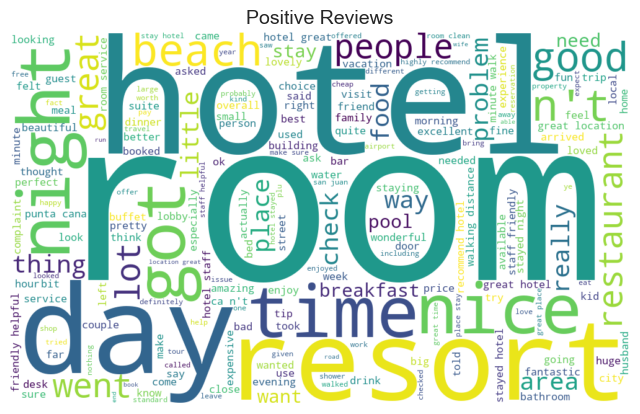

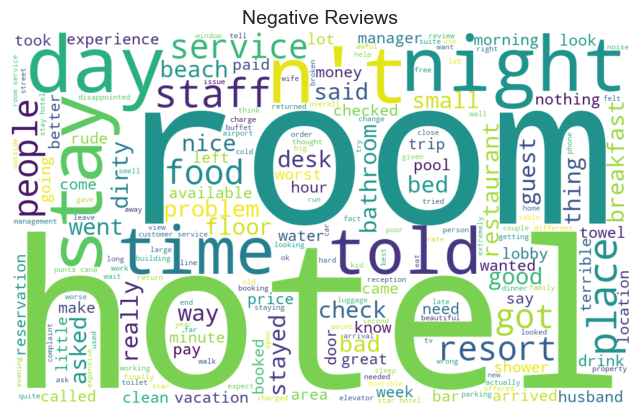

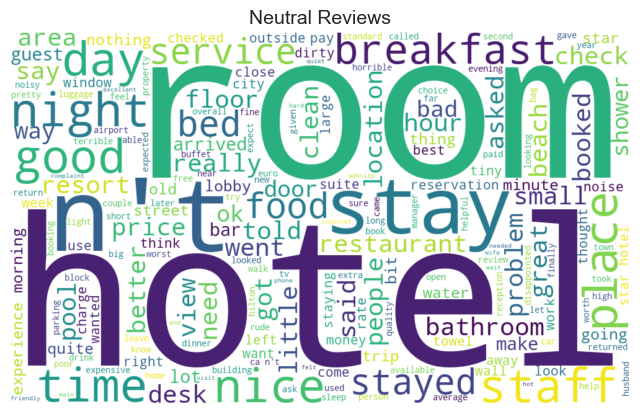

In [74]:
# Function to generate and display a word cloud
def generate_wordcloud(text, title):
    # Generate the word cloud with additional parameters
    wc = WordCloud(width=1000, height=600, background_color='white', min_font_size=10, repeat=True).generate(text)
    plt.figure(figsize=(8, 8))  # Create a new figure for each word cloud
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=14)
    plt.axis('off')
    plt.show()  # Display the word cloud

# Preparing the data: Concatenate reviews by sentiment and preprocess
positive_reviews = preprocess_text_removed_stopwords(' '.join(hotel_data[hotel_data['Sentiment'] == 'Positive']['Review'].values))
negative_reviews = preprocess_text_removed_stopwords(' '.join(hotel_data[hotel_data['Sentiment'] == 'Negative']['Review'].values))
neutral_reviews = preprocess_text_removed_stopwords(' '.join(hotel_data[hotel_data['Sentiment'] == 'Neutral']['Review'].values))

# Plotting
generate_wordcloud(positive_reviews, 'Positive Reviews')
generate_wordcloud(negative_reviews, 'Negative Reviews')
generate_wordcloud(neutral_reviews, 'Neutral Reviews')
plt.show()


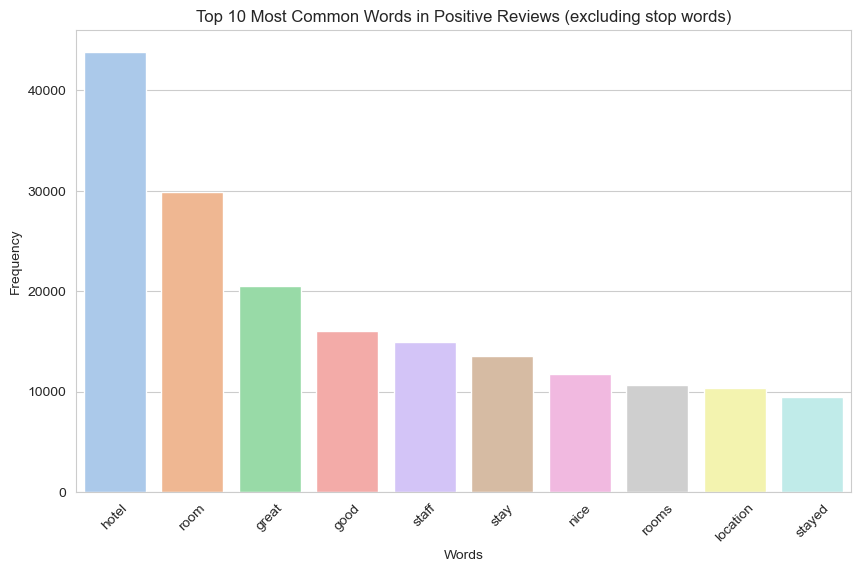

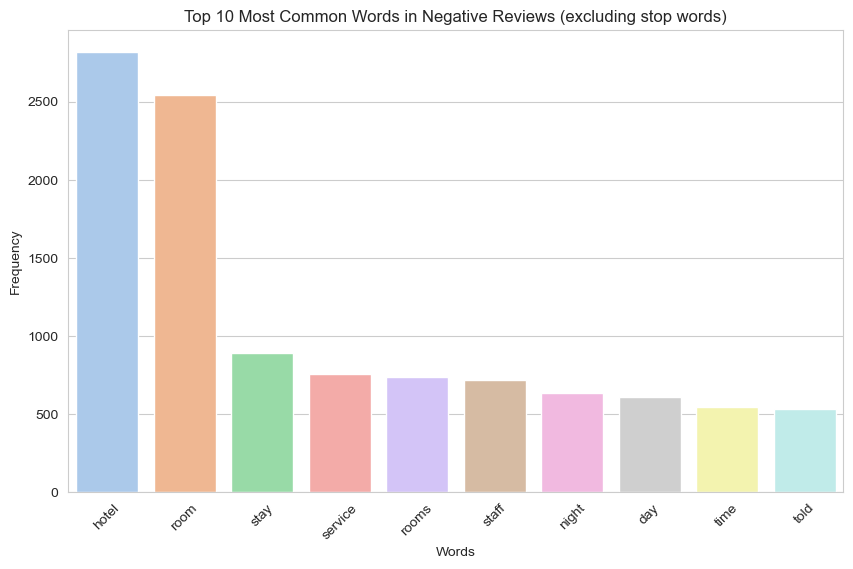

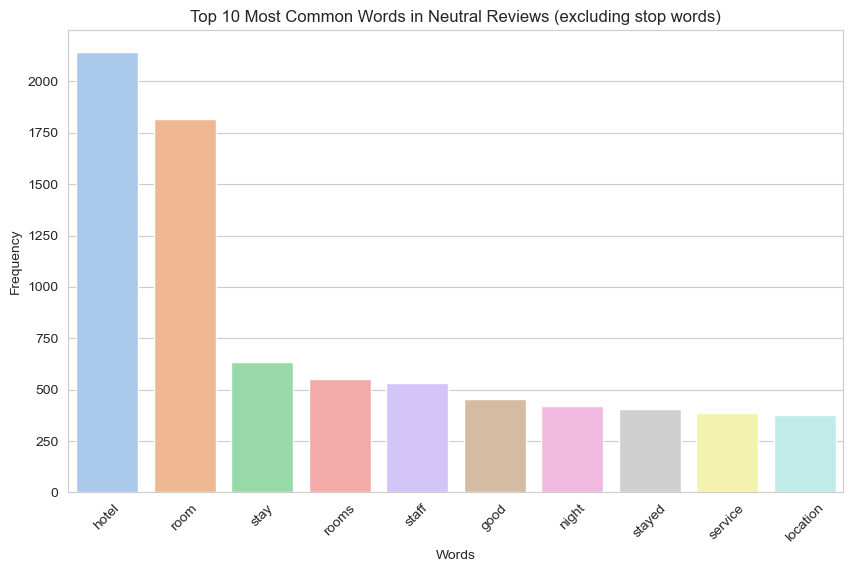

In [75]:
# Function to preprocess text: remove non-alphabetic characters
def preprocess_text(text):
    return ' '.join([word for word in text.split() if word.lower() not in stop_words and word.isalpha()])

# Function to get top words in reviews for a given sentiment
def get_top_words(reviews, num=10):
    text = preprocess_text(' '.join(reviews).lower())
    words = text.split()
    return Counter(words).most_common(num)

# Extract and visualize top words for each sentiment category
for sentiment in ['Positive', 'Negative', 'Neutral']:
    top_words = get_top_words(hotel_data[hotel_data['Sentiment'] == sentiment]['Review'], num=10)
    words, frequencies = zip(*top_words)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(words), y=list(frequencies), palette='pastel')
    plt.title(f'Top 10 Most Common Words in {sentiment} Reviews (excluding stop words)')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()


The word clouds provide a visual representation of the most frequent words for each sentiment group.

Similarly, `hotel,` `room`, and `stay` are the most common words in each category.

### Lemmatization and Tokenization with spaCy

In [76]:
import spacy
nlp = spacy.load('en_core_web_sm')

# Ensure spaCy's stop words are updated with your custom list
nlp.Defaults.stop_words |= custom_stopwords


def spacy_lemmatized_tokenizer(text):
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc 
              if not token.is_punct 
              and not token.is_stop 
              and token.lemma_.lower() not in stop_words 
              and token.lemma_.isalpha()
              and len(token.lemma_) > 1]  # Ensure token is alphabetic
    return ' '.join(lemmas)


### Lemmatization and Tokenization with NLTK

In [82]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()

def nltk_lemmatized_tokenizer(sentence):
    # Tokenize and lowercase
    tokens = word_tokenize(sentence.lower())
    
    # Lemmatize, remove punctuation/stop words/non-alpha/one-letter words
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens 
                         if token.isalpha() 
                         and token not in stop_words
                         and len(token) > 1]
    
    # Join lemmatized tokens back into a string
    return ' '.join(lemmatized_tokens)


[nltk_data] Downloading package punkt to /Users/mj/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/mj/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/mj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Comparing spaCy and NLTK 

In [87]:
# Assuming both spacy_lemmatized_tokenizer and nltk_lemmatized_tokenizer functions are defined as per your previous messages

# Define a sample text for comparison
sample_text = 'This is a test. Including non-alpha characters: 123, ù, á, ç.'

# Apply both tokenizers to the sample text
spacy_output = spacy_lemmatized_tokenizer(sample_text)
nltk_output = nltk_lemmatized_tokenizer(sample_text)

# Print the comparison
print(f'spaCy Output: {spacy_output}\nNLTK Output: {nltk_output}')


spaCy Output: test include non alpha character
NLTK Output: test including character


**Key Differences:**

- **Accuracy and Context-Awareness:** spacy_lemmatized_tokenizer might provide more accurate and contextually appropriate lemmatization due to spaCy's advanced NLP models.
- **Customization and Flexibility:** lemmatize_sentence with NLTK allows for straightforward customization of the lemmatization process, such as adjusting which POS tags to consider, but lacks the context-aware lemmatization that spaCy offers.


Therefore, we will use `NLTK` since it provides more flexibility and is faster for our use case.

### Vectorizing Text Data Using TF-IDF with Custom Stop Words and Lemmatization

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming pdf_read_data['Procedure'] contains the text you want to vectorize
tfidf_vectorizer_custom_stopwords = TfidfVectorizer(max_df=0.95, min_df=2, 
                                                    tokenizer=nltk_lemmatized_tokenizer)
X_tfidf_custom = tfidf_vectorizer_custom_stopwords.fit_transform(hotel_data['Review'].dropna())


/Users/mj/anaconda3/envs/datascience_project/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:525: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



### Finding Top 10 Keywords Using TF-IDF Scores

In [84]:
feature_names = np.array(tfidf_vectorizer_custom_stopwords.get_feature_names_out())

sorted_tfidf_index = X_tfidf_custom.max(0).toarray()[0].argsort()[::-1]

print('Top 10 keywords:')
for i in range(10):
    print(f'{feature_names[sorted_tfidf_index[i]]}: {X_tfidf_custom.max(0).toarray()[0][sorted_tfidf_index[i]]}')

Top 10 keywords:
z: 1.0
x: 1.0
v: 1.0
q: 1.0
j: 1.0
ƒ: 0.5797857831409448
ë: 0.5791004808236648
è: 0.5731414125479343
ç: 0.553515860384958
ÿ: 0.5482682563164479


Here are the top 10 keywords extracted from the "Review" column based on their TF-IDF scores:

1. consent
2. irb (Institutional Review Board)
3. process
4. icf (Informed Consent Form)
5. inform
6. compensation
7. payment
8. advertisement
9. review
10. investigator


These keywords highlight the prominent themes in the "Procedure" column, with a focus on the informed consent process and compensation. 

<font color='#FF6347'>**Note:**</font> both `Top Keywords` and `Top Common Words` refer to terms that frequently appear in a text, they are derived using different methodologies and serve different purposes:

- **Top Common Words:** This is based purely on word frequency. You simply count how many times each word appears in the text and rank them. 

- **Top Keywords (using TF-IDF):** Term Frequency-Inverse Document Frequency (TF-IDF) is a statistical measure that evaluates the importance of a word in a document relative to a set of documents (corpus). A word that appears frequently in a document but not in many documents throughout the corpus will have a high TF-IDF score.
TF (Term Frequency) is the number of times a word appears in a document divided by the total number of words in that document.
IDF (Inverse Document Frequency) is the log of the number of documents divided by the number of documents that contain the word. It diminishes the weight of terms that occur very frequently in the corpus.

Therefore, `Top Keywords` will identify words that are important in a document relative to a set of documents. It gives more weight to terms that are more unique to specific documents within the entire dataset.

## Text Preprocessing 

In [88]:
hotel_data2=hotel_data.copy()

hotel_data2['Lemmatized_Review'] = hotel_data2['Review'].apply(nltk_lemmatized_tokenizer)


In [89]:
hotel_data2.head()

,No,Review,Rating,Sentiment_Score,Sentiment,Lemmatized_Review
0,1,nice hotel expensive parking got good deal sta...,4,0.9747,Positive,nice hotel expensive parking got good deal sta...
1,2,ok nothing special charge diamond member hilto...,2,0.9787,Positive,ok nothing special charge diamond member hilto...
2,3,nice rooms not 4* experience hotel monaco seat...,3,0.9889,Positive,nice room experience hotel monaco seattle good...
3,4,unique \tgreat stay \twonderful time hotel mon...,5,0.9912,Positive,unique great stay wonderful time hotel monaco ...
4,5,great stay great stay \twent seahawk game awes...,5,0.9797,Positive,great stay great stay went seahawk game awesom...


In [91]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
X = hotel_data2['Lemmatized_Review'].values
tokenizer.fit_on_texts(X)

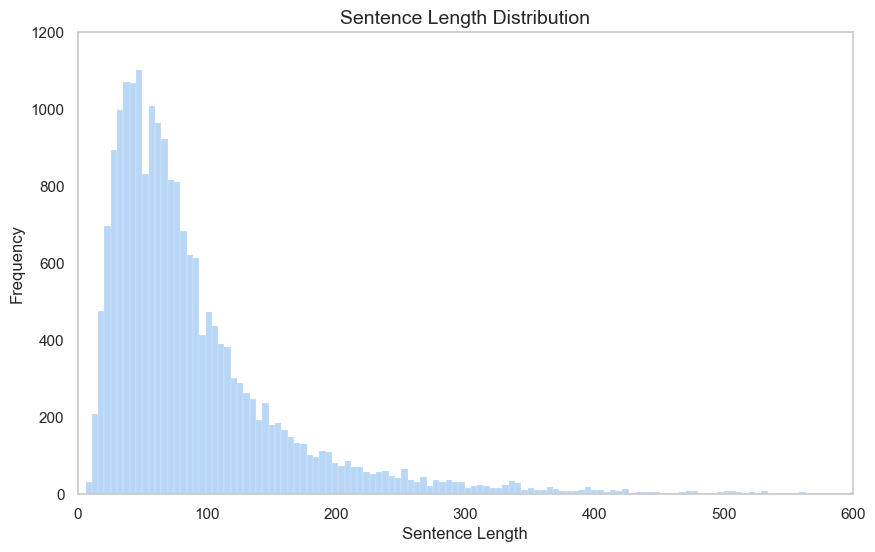

In [100]:
# Prepare your data: length distribution
length_dist = [len(x.split(' ')) for x in X]

sns.set(style='whitegrid', palette='pastel')

plt.figure(figsize=(10, 6))  
ax = sns.histplot(length_dist)  
ax.set_title('Sentence Length Distribution', fontsize=14)  
ax.set_xlabel('Sentence Length', fontsize=12)  
ax.set_ylabel('Frequency', fontsize=12)  
ax.set_xlim(0, 600)  
ax.set_ylim(0, 1200)
ax.grid(False)  
ax.patch.set_visible(False)  


plt.show()

The length of the "Lemmatized_Review" varies widely, having lengths ranging from about 10 to almost 600 characters.

To prepare data for deep learning model, we convert the lemmatized and cleaned texts into sequences. First we need to tokenize the texts and then convert them into sequences.

In [101]:
X = tokenizer.texts_to_sequences(X)
max_length = max([len(x) for x in X])
vocab_size = len(tokenizer.word_index)+1
print('Vocabulary size: {}'.format(vocab_size))
print('max length of sentence: {}'.format(max_length))

Vocabulary size: 43340
max length of sentence: 1752


In [102]:
X = pad_sequences(X, padding='post', maxlen=600)

To prepare our dataset for neural network models, which require fixed-size inputs, we apply two key preprocessing steps: padding and setting a maximum sequence length.


Our tokenized text reviews vary in length. To standardize their sizes, we use the pad_sequences function, adding zeros to sequences shorter than our specified maximum length. This ensures all inputs to the model have uniform dimensions.

Padding=`post`: We append zeros at the end of shorter sequences. This choice between appending zeros at the beginning (`pre`) or end (`post`) often depends on the model architecture and does not significantly affect performance in most cases.
Maximum Sequence Length: maxlen=600

We truncate sequences longer than 600 tokens, balancing between computational efficiency and information retention. This cutoff is chosen based on the distribution of sequence lengths in our dataset, aiming to keep the majority of the content while reducing memory and processing time.

Vocabulary Size: 43,340

The vocabulary size indicates the number of unique words in our dataset, essential for setting up model input layers, especially when using word embeddings.

These steps standardize input sequence lengths for efficient neural network training, carefully balancing the need for computational efficiency with the desire to retain as much textual information as possible.

### Remapping Ratings

> It is a good idea to remap ratings to reduce the output size for the model, we create a mapping dictionary:

In [104]:
labels = ['1', '2', '3', '4', '5']     
y = hotel_data2['Rating']
y = y.map({1: 0,
            2: 1,
            3: 2,
            4: 3,
            5: 4
           })

## Model Training

### Train Test split
We split our data into 80 percent train and 20 percent test.

In [105]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

### Recurrent Neural Network

`Recurrent Neural Network(RNN)` is a type of Neural Network where the output from the previous step is fed as input to the current step.  
This is a short-term memory to process Sequential data(Speech data, Music, Sequence of words in a text). 

Here is a sample architecture diagram:

<div style='text-align: center'>
    <img src='https://journals.plos.org/plosone/article/file?id=10.1371/journal.pone.0180944.g004&type=large' alt='rrn' title='rnn' width='800' height='500'/>
</div>

### Long Short Term Memory(LSTM)
Long Short Term Memory network usually just called `LSTM` — is an artificial recurrent neural network (RNN) architecture used in the field of deep learning. It is capable of learning long-term dependencies.  
It is introduced by [Hochreiter & Schmidhuber (1997)](URL 'http://www.bioinf.jku.at/publications/older/2604.pdf'). LSTM is explicitly designed to avoid the long-term dependency problem.  

Unlike standard feedforward neural networks, LSTM has feedback connections. It can not only process single data points (such as images), but also entire sequences of data (such as speech or video). For example, LSTM is applicable to tasks such as unsegmented, connected handwriting recognition,speech recognition and anomaly detection in network traffic or IDSs (intrusion detection systems)

<div style='text-align: center'>
    <img src='https://miro.medium.com/v2/resize:fit:1200/1*7cMfenu76BZCzdKWCfBABA.png' alt='lstm' title='lstm' width='800' height='500'/>
</div>

In [106]:
EPOCHS = '2'
embedding_dim = '16'
BATCH_SIZE = '125'
units = '76'
val_split = '0.12'

In [107]:
model = tf.keras.Sequential([
    L.Embedding(vocab_size, int(embedding_dim), input_length=X.shape[1]),
    L.Bidirectional(L.LSTM(int(units),return_sequences=True)),
    L.Conv1D(64,3),
    L.MaxPool1D(),
    L.Flatten(),
    L.Dropout(0.2),
    L.Dense(128, activation="relu"),
    L.Dropout(0.2),
    L.Dense(64, activation="relu"),
    L.Dropout(0.2),
    L.Dense(5, activation="softmax")
])

2024-02-13 02:15:46.598905: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-02-13 02:15:46.600339: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-02-13 02:15:46.601034: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

### Compiling Model
For compiling our neural network model, we utilize the **`Sparse Categorical Crossentropy`** loss function, which is ideal for multi-class classification tasks with sparse labels. We opt for the **`ADAM Optimizer`**, renowned for its efficiency in handling sparse gradients and noisy data. To gauge the model's performance during training, we monitor the **`accuracy metric`**, which measures the proportion of correctly predicted labels. This configuration is tailored to ensure our model is well-optimized for predicting accurate class indices across multiple categories.


In [109]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer='adam',metrics=['accuracy']
             )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 600, 16)           693440    
                                                                 
 bidirectional (Bidirectiona  (None, 600, 152)         56544     
 l)                                                              
                                                                 
 conv1d (Conv1D)             (None, 598, 64)           29248     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 299, 64)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 19136)             0         
                                                                 
 dropout (Dropout)           (None, 19136)             0

## Training for 2 EPOCHS

During the model training phase, we limited the process to **`2 epochs`** based on observing that model metrics began to deteriorate beyond this point, indicating optimal learning within this timeframe. We used a **`validation split`** to assess the model's performance on unseen data, ensuring our model's generalization capabilities. The training was executed in batches, as defined by the **`batch size`**, to efficiently manage memory usage and model updates. The process's verbosity was set to provide concise yet informative feedback about the training progress. This approach ensures a balanced training regimen that maximizes model performance without overfitting, achieving the best results with a concise training period.



In [110]:
history = model.fit(X_train, y_train, epochs=int(EPOCHS), validation_split=float(val_split), batch_size=int(BATCH_SIZE), verbose=2)

Epoch 1/2


2024-02-13 02:22:08.735705: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-02-13 02:22:08.736418: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-02-13 02:22:08.737241: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

116/116 - 60s - loss: 1.1828 - accuracy: 0.4812 - val_loss: 0.9195 - val_accuracy: 0.5950 - 60s/epoch - 520ms/step
Epoch 2/2
116/116 - 58s - loss: 0.8436 - accuracy: 0.6163 - val_loss: 0.8269 - val_accuracy: 0.6316 - 58s/epoch - 500ms/step


To gain insights into our model's training and validation performance over epochs, we utilize Plotly's interactive line plot. This visualization focuses on tracking the `accuracy` and `validation accuracy` metrics throughout the training process:

In [111]:
import plotly.express as px

fig = px.line(
    history.history, y=['accuracy', 'val_accuracy'],
    labels={'index': 'epoch', 'value': 'accuracy'},
    title='Model Accuracy During Training'
)

fig.update_layout(
    xaxis_title='Epoch',
    yaxis_title='Accuracy',
    legend_title='Metric',
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01)
)

fig.show()


We employ a line graph to track the progression of the model's **Sparse Categorical Crossentropy loss** for both training (`loss`) and validation (`val_loss`) across each training epoch. This approach offers a visual representation of how the model's prediction error decreases with successive epochs, which is instrumental in identifying overfitting or underfitting behaviors. A closing gap between training and validation loss signifies effective learning, whereas a diverging trend might indicate the model is learning the noise in the training data rather than the underlying patterns.

The interactive plot below showcases the fluctuation of loss values, providing an intuitive means to pinpoint the epoch at which the model achieves an optimal balance between learning and generalization:

In [113]:
fig = px.line(
    history.history, y=['loss', 'val_loss'],
    labels={'index': 'epoch', 'value': 'loss'},
    title='Sparse Categorical Crossentropy Loss During Training'
)

fig.update_layout(
    xaxis_title='Epoch',
    yaxis_title='Loss',
    legend_title='Data Type',
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01)
)

fig.show()

## Prediction

In [114]:
pred = model.predict(X_test)
pred_final = np.argmax(pred,axis=-1)
pred_final

2024-02-13 02:28:16.163890: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-02-13 02:28:16.165568: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-02-13 02:28:16.166415: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

129/129 [==============================] - 10s 72ms/step


array([0, 4, 2, ..., 2, 4, 4])

### Performance Metric

We will use three methods to test performance: 

- `Accuracy Score:` is a performance metric representing the proportion of correct predictions made by the model out of all predictions.
- `Root Mean Square Error (RMSE):` is a commonly used metric that measures the differences between predicted and observed values by a model or estimator.
- `Confusion Matrix:` is a detailed performance metric that provides insight into the accuracy of the model by displaying the number of correct and incorrect predictions broken down by each class.

#### Accuracy

In [115]:
from sklearn.metrics import accuracy_score
print('Accuracy: {}'.format(accuracy_score(pred_final, y_test)))

Accuracy: 0.6225908758233716


#### Root Mean Square Error

In [116]:
from sklearn.metrics import mean_squared_error
print("Root mean square error: {}".format(np.sqrt(mean_squared_error(pred_final,y_test))))

Root mean square error: 0.7576558911391748


#### Confusion Matrix

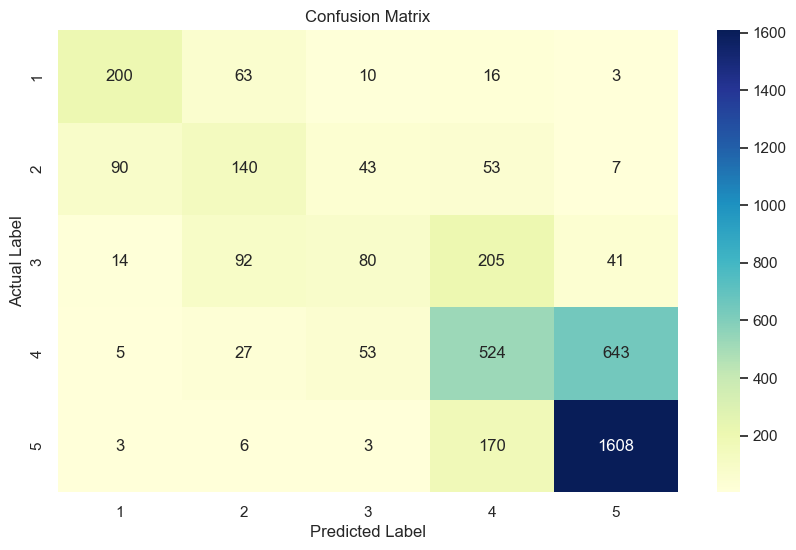

              precision    recall  f1-score   support

           1       0.64      0.68      0.66       292
           2       0.43      0.42      0.42       333
           3       0.42      0.19      0.26       432
           4       0.54      0.42      0.47      1252
           5       0.70      0.90      0.79      1790

    accuracy                           0.62      4099
   macro avg       0.55      0.52      0.52      4099
weighted avg       0.60      0.62      0.60      4099



In [120]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming 'conf' is your confusion matrix and 'labels' are the unique rating categories
conf = confusion_matrix(y_test, pred_final)

# Creating a DataFrame for the confusion matrix for better visualization
cm = pd.DataFrame(
    conf, 
    index = [i for i in labels],
    columns = [i for i in labels]
)

# Visualizing the confusion matrix
plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# Generating the classification report
report = classification_report(y_test, pred_final, target_names=labels)
print(report)

**`Interpretation`**:

Choosing between precision, recall, or F1-score for comparing model performance depends on the specific requirements and context of the problem. 

In the context of hotel rating predictions, we can conclude that:

> If ensuring that every predicted high rating (e.g., 5 stars) is truly deserved is crucial to maintain trust and reliability (minimizing false positives), we need to prioritize `precision`, which in this case we observe that the precision is the highest for the 5th rated. 

> If capturing every actual high rating is critical to not overlook any high-quality services (minimizing false negatives), we will focus on `recall`. 

> For a balanced evaluation, especially when dealing with varied or imbalanced rating distributions (which is our case), we can count on `F1-score`. 

## Conclusion

The overall performance of deep learning model was acceptable, and we can improve this performance by using a better deep learning model and text preprocessing. 

Moreover, it would be an interesting idea to test other text classification model such as XGBoost. 

Sentiments analysis of reviews did not provide any furtheyr insights. 

Finding the most common words for ratings indicate that words such as `hotel`, `room`, `service`, `staff` and etc. are the most concern of customers which shows more value for hotel management team to consider. 